<a href="https://colab.research.google.com/github/Roxaxx/Data110/blob/main/Roxaxx_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

#View the first few rows of the data set
titanic.head()



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#Part1: Understanding the Dataset

Task 1: Dataset Overview

The dataset includes information about passengers with features as survival status, passenger class, sex, age, number of siblings,/spouses, (sibsp) number of parent/children aboard(parch) fare, embarked, class, who, adult_male, deck, embark_town, town, alive and alone. The age, sex, and class features are most likely relevant for determining whether or not passengers survived. The dataset also contains features called "gender", deck and age, additional null and non-null deck values.


#Part 2: Fare and Survival Analysis
    Task 2: Fare Distribution

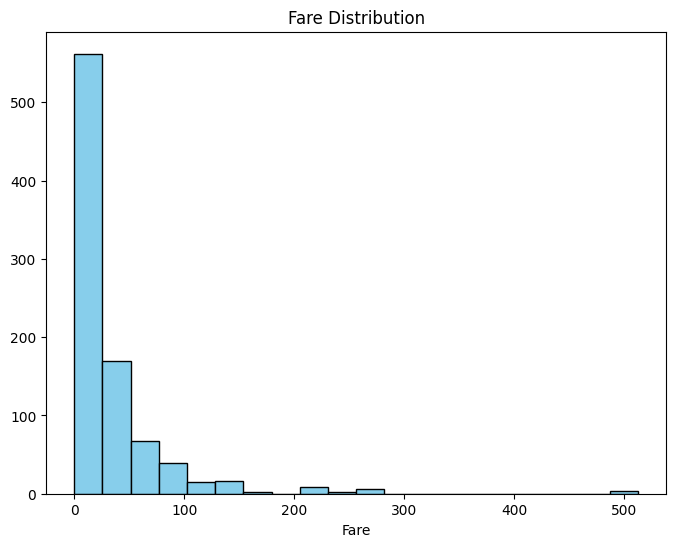

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(titanic['fare'], bins=20, color='skyblue', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

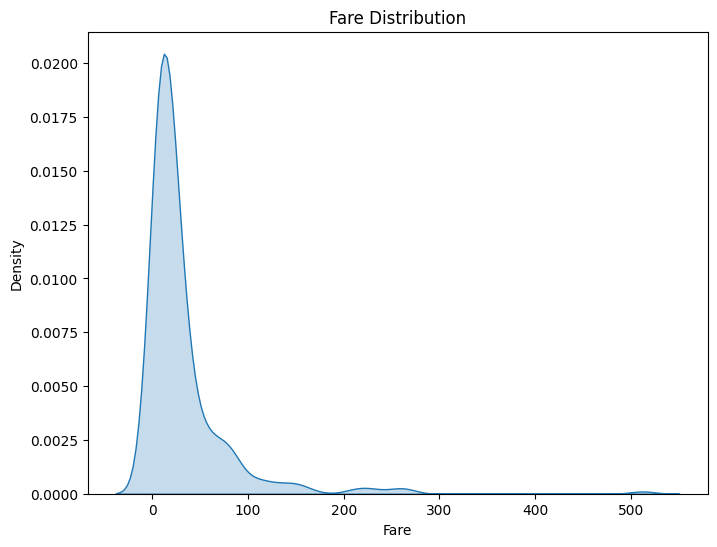

In [23]:
# KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(titanic['fare'], fill=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()


The data is right-skewed wiyh outliners around the 500 mark, likely representing high-income earners. Fare rates could influence survival, as first-class passenger might have had better or more evacuation options.

3.  Fare and survival rates

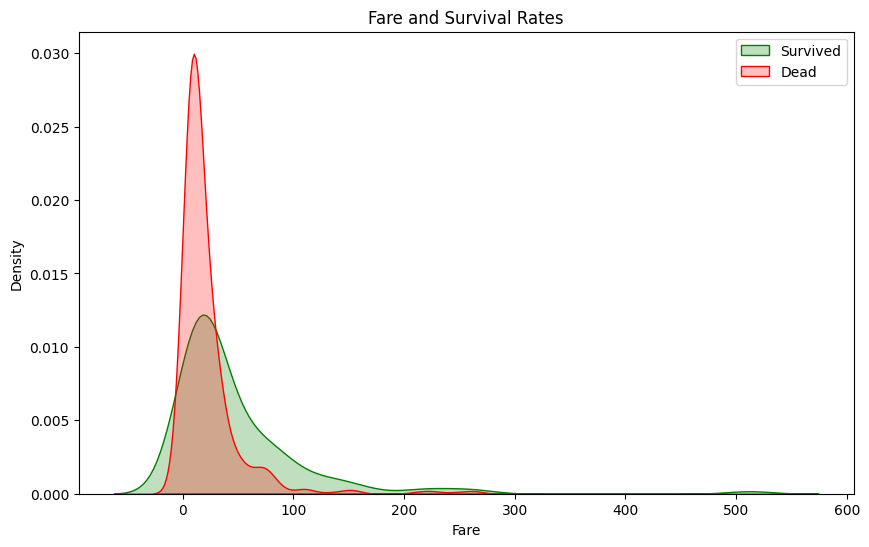

In [28]:
plt.figure(figsize=(10,6))
survived = sns.kdeplot(x='fare', data=titanic[titanic['survived'] == 1], color='green', label='Survived', fill=True)
Dead = sns.kdeplot(x='fare', data=titanic[titanic['survived'] == 0], color='red', label='Dead', fill=True)
plt.legend()
plt.title('Fare and Survival Rates')
plt.xlabel('Fare')
plt.legend
plt.show()

Yes, fare appears to have influenced survival. The distributions suggest that higher fares, associated wirh upper-class passengers correlates with higher survival rates. Conversely, the lower fare distribution indicates that many passengers from lower socioeconomic backgrounds had lower survival chances.


#Part 3: Class, Fare, and Survival Insight

Task 4: Passenger Class, Fare, and Survival

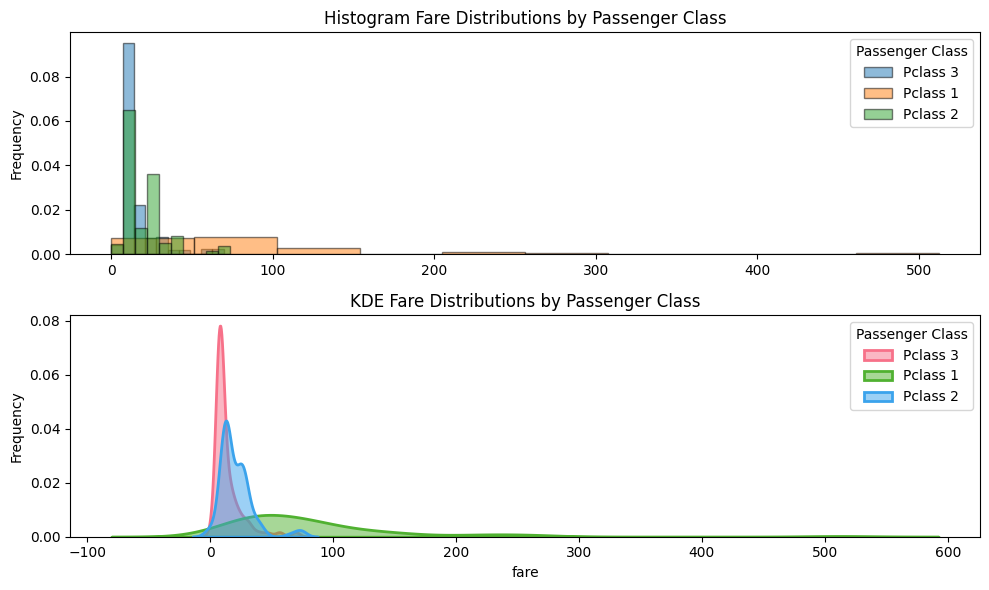

Survival Rates by Passenger Class:
pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


In [29]:
#histogram and kde plot

plt.figure(figsize=(10, 6))

# Create a color palette for different passenger classes
palette = sns.color_palette("husl", len(titanic['pclass'].unique()))

# Loop through each unique passenger class and plot
for i, pclass in enumerate(titanic['pclass'].unique()):
    plt.subplot(2, 1, 1)  # First subplot for histogram
    # Create a subset for each passenger class
    subset = titanic[titanic['pclass'] == pclass]
    # Create a histogram for the fare of that class
    plt.hist(subset['fare'], bins=10, alpha=0.5, edgecolor='black', density=True, label=f'Pclass {pclass}')

    plt.subplot(2, 1, 2)  # Second subplot for KDE
    # Create a KDE plot for the fare of that class
    sns.kdeplot(subset['fare'], fill=True, alpha=0.5, color=palette[i], label=f'Pclass {pclass}', linewidth=2)

# Set titles and labels
plt.subplot(2, 1, 1)
plt.title('Histogram Fare Distributions by Passenger Class')
plt.ylabel('Frequency')
plt.legend(title='Passenger Class')

plt.subplot(2, 1, 2)
plt.title('KDE Fare Distributions by Passenger Class')
plt.ylabel('Frequency')
plt.legend(title='Passenger Class')

# Show the plots
plt.tight_layout()
plt.show()

# Analyzing survival rates for each class
survival_rates = titanic.groupby('pclass')['survived'].mean()
print("Survival Rates by Passenger Class:")
print(survival_rates)


The fare distribution and survival rates on the Titanic highlights socioeconomic divisions. Passengers in Pclass1, who paid higher fares, had a survival rate much higher than Pclass 3 passengers, who paid the least, Pclass 3 passengers faced a lower survival rate. This contrast illustrates the preferencial treatment of wealthier passengers and the significant class disparities on the Titanic


#Part 4: Age and Survival

Task 5: Age of Survivors and Non-Survivors


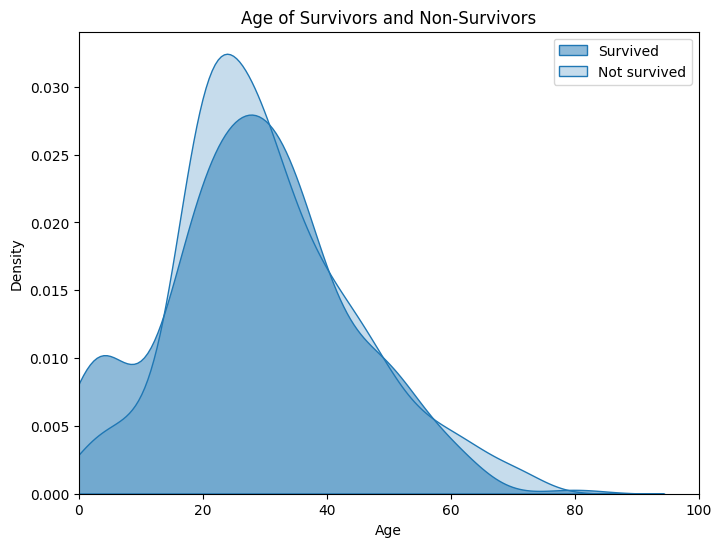

In [30]:
# kde plot
plt.figure(figsize=(8, 6))
sns.kdeplot(titanic.loc[titanic['survived']==1, ['age']], fill=True, color="blue", label='Survived', alpha=0.5)
sns.kdeplot(titanic.loc[titanic['survived']==0, ['age']], color='red', fill=True, label='Not survived')

plt.xlim(0, 100)

# title and label
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age of Survivors and Non-Survivors')

# legend
plt.legend()

# show
plt.show()


The age distribution for survival suggest younger individuals survived better than their older counterparts.


#Task 6: Pyramid Histogram for Age Survival by Sex

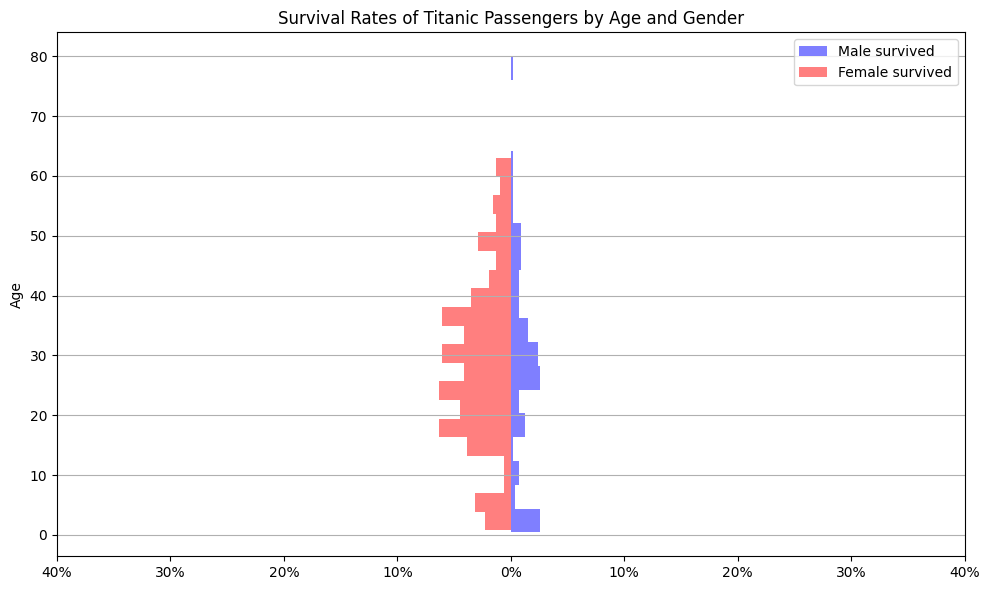

In [31]:
Male = titanic[titanic['sex'] == 'male']['age']
Female = titanic[titanic['sex'] == 'female']['age']

# Filter for survivors only (Male and Female)
Male_survived = titanic[(titanic['sex'] == 'male') & (titanic['survived'] == 1)]['age']
Female_survived = titanic[(titanic['sex'] == 'female') & (titanic['survived'] == 1)]['age']

# Calculate the total male and female passengers
total_male = len(Male)
total_female = len(Female)

# Create a figure
plt.figure(figsize=(10,6))

# Plot normalized histograms for survival rates
# Male on the right
plt.hist(Male_survived, bins=20, label='Male survived', alpha=0.5, color='blue',
         orientation='horizontal', weights=[1/total_male] * len(Male_survived))


# Female on the left (multiply weights by -1)
plt.hist(Female_survived, bins=20, label='Female survived', alpha=0.5, color='red',
         orientation='horizontal', weights=[-1/total_female] * len(Female_survived))


# Label and customize plot
plt.ylabel('Age')
plt.title('Survival Rates of Titanic Passengers by Age and Gender')

# Adjust xticks to show percentages
plt.grid(axis='y')
plt.xticks([-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4], ['40%','30%','20%','10%','0%','10%','20%','30%','40%'])

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


Women and kids had higher survival rates than men. This shows that women and kids were prioritized to safety on rescue boats.